In [20]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [21]:
dataset = pd.read_csv('sampleVc.csv')
x = dataset['x']
y = dataset['y']

In [22]:
def func(x, *params):

    #paramsの長さでフィッティングする関数の数を判別。
    num_func = int(len(params)/3)

    #ガウス関数にそれぞれのパラメータを挿入してy_listに追加。
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
        y_list.append(y)

    #y_listに入っているすべてのガウス関数を重ね合わせる。
    y_sum = np.zeros_like(x)
    for i in y_list:
        y_sum = y_sum + i

    #最後にバックグラウンドを追加。
    y_sum = y_sum + params[-1]

    return y_sum

In [23]:
def fit_plot(x, *params):
    num_func = int(len(params)/3)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2) + params[-1]
        y_list.append(y)
    return y_list

In [24]:
#初期値のリストを作成
#[amp,ctr,wid]
guess = []
guess.append([350, 73.75, 0.01])
guess.append([500, 73.80, 0.01])
guess.append([500, 73.83, 0.01])
guess.append([500, 73.88, 0.01])
guess.append([500, 73.92, 0.01])
guess.append([500, 73.95, 0.01])
guess.append([200, 74.00, 0.01])

#バックグラウンドの初期値
background = 30

#初期値リストの結合
guess_total = []
for i in guess:
    guess_total.extend(i)
guess_total.append(background)

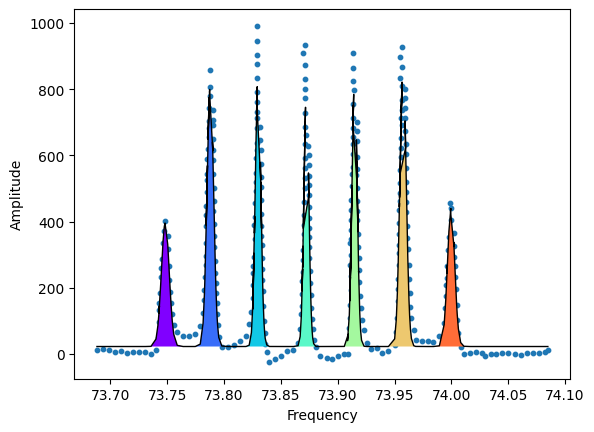

In [25]:
popt, pcov = curve_fit(func, x, y, p0=guess_total)

plt.xlabel('Frequency')
plt.ylabel('Amplitude')

fit = func(x, *popt)
plt.scatter(x, y, s=10)
plt.plot(x, fit , ls='-', c='black', lw=1)

y_list = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n,i in enumerate(y_list):
    plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=1)

In [26]:
# フィッティングされたパラメータを表示
print("Fitted Parameters:")
for i in range(int(len(popt) / 3)):
    print(f"Gaussian {i + 1}: Amplitude={popt[3 * i]}, Center={popt[3 * i + 1]}, Width={popt[3 * i + 2]}")
print(f"Background: {popt[-1]}")

Fitted Parameters:
Gaussian 1: Amplitude=374.1086372191875, Center=73.74828415055511, Width=0.004878053609133095
Gaussian 2: Amplitude=789.4996078789254, Center=73.78786888831772, Width=0.004068048774887453
Gaussian 3: Amplitude=817.4898388063714, Center=73.82989376127449, Width=0.0033772435859962505
Gaussian 4: Amplitude=765.6457346415839, Center=73.87242145219645, Width=0.003036876111496191
Gaussian 5: Amplitude=807.699423211554, Center=73.91485144925637, Width=0.003166153250177027
Gaussian 6: Amplitude=838.1345209768116, Center=73.95751185748212, Width=0.003906594132510143
Gaussian 7: Amplitude=416.71982598483254, Center=73.99976490184345, Width=0.004486752930175604
Background: 22.503362425703777
